# Introduction and Motivation

The body fat percentage (BFP) of a human is a value that tells you how much of your body weight is made up of fat.

If the body fat percentage is too low, our resistance to diseases and energy levels are lower. While if the body fat percentage is too high, we may have a higher risk of diabetes and other health problems. In terms of overall health, body fat percentage may be an important number for us.

Unlike height and weight,bfp can not be measured easily and directly. So we want to build an simple, but robust model to estimate the body fat percentage using clinically available measurement. 

# Data description

The dataset contains 252 observations of 16 features: like "BODYFAT"(%), "DENSITY"(gm/cm$^{3}$), "AGE"(years) and "WEIGHT"(lbs). Among these features,"DENSITY" is measured accurately from underwater weighing and "BODYFAT" is obtained by Siri's equation,which tells the linear relation between body fat percentage and density: $B= \frac{495}{D} - 450$.

Note: B is the percentage of body fat,D is body density.

After looking at the row data roughly, we choose to build a linear regression model. 


## note( not yet)
We choose to build a linear model on this dataset. We know there are several important characteristics assumptions about linear regression.

* 1.Sensitive to outliers  
  In data cleaning part, we draw a linear relationship diagnostic plot to detect outliers.
  
* 2.Multivariate normality diagnostic plot    
  ??

* 3.multicollinearity  
  We use Variance Inflation Factor to check multicollinearity. But since our main target is prediction, we didn't put too much emphasis on this part.
  
* 4.Homoscedasticity   
  ?? Did we do the log transformation to avoid heteroscedasticity?
  

# Data cleaning

We know that linear regression model is sensitive to outliers, so we detect outliers by two different ways. The first one is to use siri equation since we know there exists linear relation between body fat percentage and density.

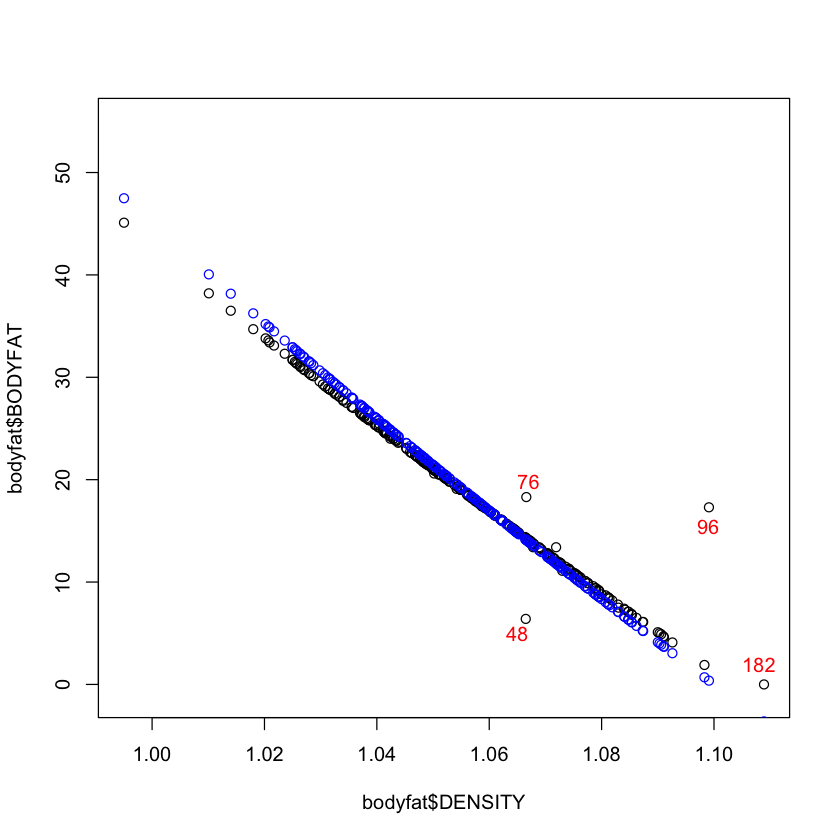

In [109]:
setwd("/Users/joyzhu/UWM/STAT628/Module1")
bodyfat<-read.csv("BodyFat.csv",header = T)
plot(x=bodyfat$DENSITY,y=bodyfat$BODYFAT,ylim=c(-1,55))
points(x=bodyfat$DENSITY,y=495/bodyfat$DENSITY-450,col="blue")

# I add no.76 in this part because this point also seems away from the line. But it doesn't influence the model 
# fitting part because I maintain this record after looking at other measurements. We can talk about this later if you 
# guys think it is unnecessary.
text(1.065,5,as.numeric(which(bodyfat$DENSITY<1.07 & bodyfat$DENSITY>1.06 & bodyfat$BODYFAT>5 & bodyfat$BODYFAT<10)),col = "red")
text(1.099,15.4,as.numeric(which(bodyfat$DENSITY<1.11 & bodyfat$DENSITY>1.09 & bodyfat$BODYFAT>15 & bodyfat$BODYFAT<20)),col = "red")
text(1.108,2,as.numeric(which(bodyfat$DENSITY>1.1 & bodyfat$BODYFAT<5)),col = "red")
text(1.067,19.8,as.numeric(which(bodyfat$DENSITY<1.07 & bodyfat$DENSITY>1.06 & bodyfat$BODYFAT>18 & bodyfat$BODYFAT<20)),col = "red")

From the plot above, three records 48, 96, 182, 76 seem abnormal.

In [99]:
bodyfat[c(48,96,182,76),]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3


* No.48: The BODYFAT calculated by DENSITY IS about 14.1%, but 6.4% seems to be a possible value so we just keep this value. Then we build a linear regression model to detect whether this is an outlier by cook's distance.
* No.96: The BODYFAT calculated by DENSITY iS about 0.37%, which is extremely small, but other measurements are quite normal. So we think the value of DENSITY may be a wrong record and we keep the original BODYFAT value.
* No.182: We think 0% of bodyfat is impossible, and the BODYFAT calculated by DENSITY iS negative, so we regard this as a wrong record and directly delete it.
* No.76: The BODYFAT calculated by DENSITY IS about 14.1%, but 18.3% seems possible because this person is 61 years old and older people may have higher percentage of fat so we just keep this value. 

Then the other method we use is to build a linear regression model to detect outliers by cook's distance.

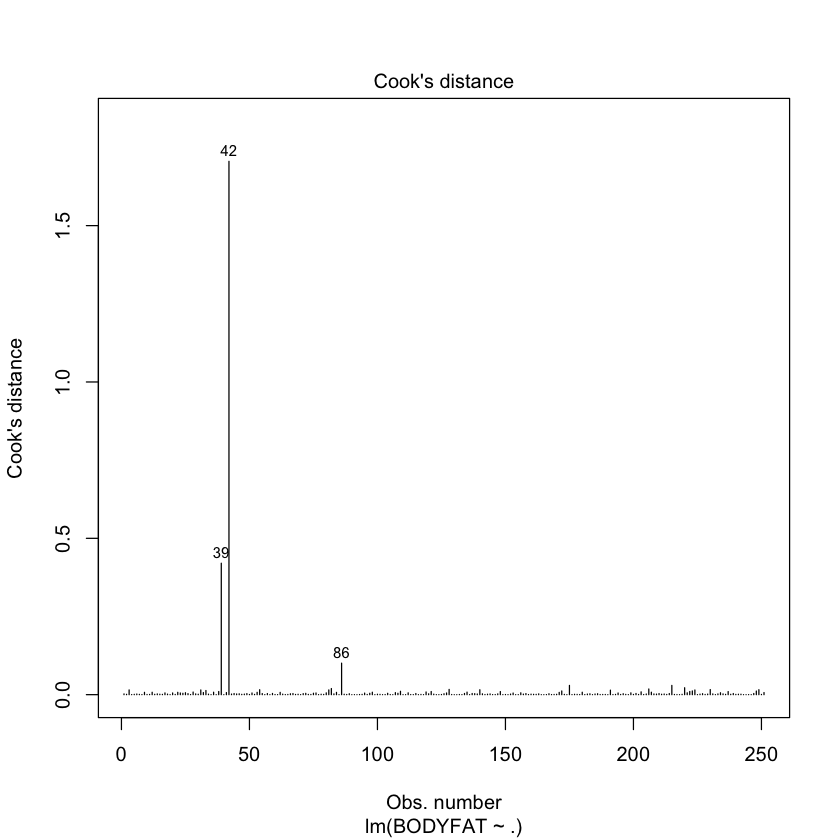

In [73]:
bodyfat<-bodyfat[-182,] #remove the 0% bodyfat observation
model0 <- lm(BODYFAT ~ ., data=subset(bodyfat,select=-c(DENSITY,IDNO)))
#summary(model0)$coefficients
plot(model0, which=4)

In [74]:
bodyfat[c(39,42,86),]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
42,42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
86,86,25.8,1.0386,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2


* No.39: It's a trade-off for us to decide whether to keep such a fat person in our model. We want our method to be precise and robust, which means we want our calculator to have good performance for data drawn from a wide range of probability distributions, especially for distributions that are not normal.
* No.42: The HEIGHT is 29.50 inches, which is obviously a wrong record, so we remove this observation.
* No.86: All the measurement seems reasonable, we don't remove it.

In [75]:
bodyfat<-bodyfat[-42,]



Then we delete the "IDNO" and "DENSITY" column because we decide to use "BODYFAT" as the dependent variable of our model.

The last step of data preparation is splitting the whole dataset into training and testing part. We set 20% of original data size as our test dataset size to check the performance of the model on unseen data.

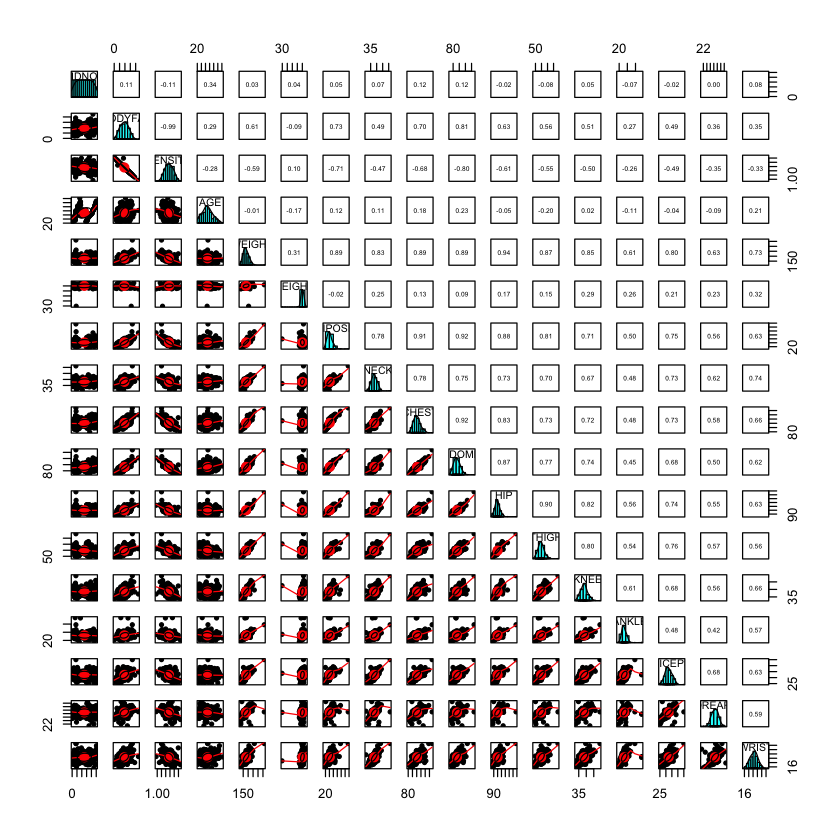

In [81]:
library("psych")
pairs.panels(bodyfat)
# intend to check linearity between variables, but too ugly, may delete

In [76]:
# split train and test data
bodyfat<-bodyfat[bodyfat$BODYFAT!=0,]
samplesize<-dim(bodyfat)[1]
set.seed(628) ##20% for test data
id<-seq(1,samplesize,1)
testid<-sample(id,samplesize*0.2)
test<-bodyfat[testid,]
train<-bodyfat[-testid,]

# Variable Selection

To make our model simple, we do variable selection by using several methods such as AIC,BIC,Random Forest and LASSO, we use rmse as our criterion. 

## 0129 dis
mention collinearity, exists but not important , main target is prediction
lasso : cv hold 14 variables
choose certain lamda, height and abdomen

prediction error

In [77]:
#calculate mse
root.mse <- function(y, yhat) return(sqrt(mean((y - yhat) ^ 2)))


# Stepwise selection
set.seed(628)
lm.max <- lm(BODYFAT ~ ., data = train)
lm.min <- lm(BODYFAT ~ 1, data = train)
scope <- list(lower=lm.min, upper=lm.max)

# AIC
lm1 <- step(object = lm.max, scope = scope, direction = 'both',
            trace = 0, k = 2) # K=2->AIC, K=log(n)->BIC
lm2 <- step(object = lm.min, scope = scope, direction = 'both',
            trace = 0, k = 2) # K=2->AIC, K=log(n)->BIC

# BIC
lm3 <- step(object = lm.max, scope = scope, direction = 'both',
            trace = 0, k = log(dim(train)[1]))
lm4 <- step(object = lm.min, scope = scope, direction = 'both',
            trace = 0, k = log(dim(train)[1]))

# LASSO
library("glmnet")
#glmnet.train <- as.matrix(train[c('AGE', 'HEIGHT', 'ABDOMEN', 'WRIST')])
glmnet.train <- as.matrix(train[c('ABDOMEN', 'HEIGHT')])
cv.lasso <- cv.glmnet(glmnet.train, train$BODYFAT, type.measure = 'mse', alpha = 1)
print(best.lambda <- cv.lasso$lambda.min)
lasso.model <- glmnet(glmnet.train, train$BODYFAT, lambda = best.lambda, alpha = 1)
print(root.mse(train$BODYFAT, predict(lasso.model, glmnet.train)))
lasso.model
##summary(lm(BODYFAT ~ 1 + ABDOMEN + WRIST + AGE, dat))
#plot(lasso.model)
coefficients=coef(lasso.model)


[1] 0.0430074
[1] 4.247695



Call:  glmnet(x = glmnet.train, y = train$BODYFAT, alpha = 1, lambda = best.lambda) 

     Df   %Dev  Lambda
[1,]  2 0.7112 0.04301

Below is the table shows selected variables and their corresponding methods.

Method  | Selected Variables | mse | Adjusted R$^{2}$   
------|------|------|------
AIC  | XXX | aa  |bb
BIC  | XXX     | aa  |bb  
RF  | XXX     | aa  |bb 
LASSO  | XXX     | aa  |bb  

Among all features, the linear function of WEIGHT, ABDOMEN and WRIST can best interpret BODYFAT.

# Model Fitting

# Model Evaluation and Diagnostic

# Strengths and Weakness

### Strengths: 
* easy to understand and calculate since we only use variables of first order. 
* robust and precise since we check (cv/maintain some value/) to avoid overfitting and underfittting.
* accurate based on (adjusted r square/prediction error/mse?)



### Weakness:
* only works for males
* how our model be influenced by including some special points?
* linearity assumptions?

# Conclusions

Finally we got the equation:
It is a simple linear regression model to predict body fat percentage of a person.